## 1.1. Main formulas

### 1.1.1. Expected Signal-to-Noise ratio

Before we start considering even different types of modulation it is extremely valuable to know what SNR values can be expected on the receiver side. In fact, we can calculate the SNR as:

$$ SNR = P_t + G_t + G_r + \eta_{t} + \eta_{r} - L_r - L_t - L_{add} - L - N \qquad (1.1) $$

where $N$ is the total termal noise power \(relates to the noise spectral density $N_0=kT_{noise}$ and double-sided white noise variance $\sigma^2=\frac{N_0}{2}$\) in dBm, $P_t$ is the transmitted power in dBm, $G_t$ and $G_r$ are the antenna gains  on the transmitter and receiver sides respectively \(in dBi\), $\eta_{t}$ и $\eta_{r}$ are feeder gains in dB, $L_t$ and $L_r$ are the feeder losses in dB, $L$ is the path losses in dB, $L_{add}$ is additional losses \(some margin\) in dB.

### 1.1.2. Path loss

Path losses can be estimated by Friis formula:


$$ L = 20lg\frac{\lambda}{4\pi d}[dB] \qquad (1.2)$$


where $\lambda$ \(relates to the carrier frequency $f_0=\frac{c}{\lambda}$, $c$ is the speed of electromagnetic wave\) is the wave length and $d$ is the distance between satellite and the ground station.

### 1.1.3. Noise power

Noise power can be calculated by:

$$
N = 10lg\left(\frac{kT_{noise}B_{noise}}{10^{-3}}\right) [dBm] \qquad (1.3)
$$

where $k$ is the Boltzmann constant, $T_{noise}$ is the equivalent noise temperature and $B_{noise}$ is the noise bandwidth. According to \[1, p.98\] the noise bandwidth $B_{noise}$ can be estimated as $\gamma B$, where $B$ is the receiver bandwidth and $\gamma$ is the constant from 1.002 to 1.57 that relates to configuration of the receiver.

Equivalent noise temperature is not the physical temperature of an antenna. It is equal to the temperature of a resistor, which would have the same thermal noise power in the given frequency band. This parameter can be represented as:

$$
T_{noise} = T_a+T_e \qquad (1.4)
$$

where $T_a$ is the sum of antenna losses and sky noise and $T_e$ is the receiver noise temperature. Additionally, receiver noise temperature can be calculated by following formula:

$$
T_e=T_0(F_{sys}-1) \qquad (1.5)
$$

where $T_0$ is equal to $290K$ and $F_{sys} = 10^{\frac{NF}{10}}$ is the noise factor which can be estimated by noise figure \($NF$\) of the receive antenna.



## 1.2. Additional losses
The short review of additional losses can be obtained via the [following link](https://github.com/kirlf/cubesats/blob/master/LinkBudget/AddLoss.ipynb).

## 1.3. Parameters summary

Let us provide some parameters summary:

1. **Initial point:** carrier frequency,  hight of the orbit;
2. **Equipment dependent parameters \(adjustable\)**: transmitted power , receiver bandwidth ;
3. **Reference data:** antenna gains and losses, feeder gains and losses , noise temperature,  additional losses.


## 1.4. Sat-to-Ground distance and visibility time

The theoretical description can be obtained via the [following link](https://github.com/kirlf/cubesats/blob/master/LinkBudget/SatDist.ipynb). 

## 1.5. Considered equipment

In fact, we use informstion about common example of ground station such as [IC-910H](http://sicom.ru/catalog/radiostancii/lyubitelskie/bazovye/icom-ic-9100.html) or [ISIS ground station](https://www.cubesatshop.com/product/full-ground-station-kit-vhfuhfs-band/) however we can estimate some parameter of mobile stations of real space communication systems also. Fortunately, a lot of this information is open and available on official sites: [Iridium](https://www.iridium.com%20), Globalstar[](https://www.globalstar.com) and [Gonets](http://www.gonets.ru/rus/%20).

These parameters can be used for calculation of up-link link budget.

For down-link estimation real example of CubeSat transceivers such as [NanoCom AX100](https://gomspace.com/Shop/subsystems/communication/nanocom-ant2000.aspx) \(fig. 1.6.1\) may be used. Additionally, as an example of CubeSat UHF/VHF antenna omnidirectional [NanoCom ANT430](https://gomspace.com/Shop/subsystems/communication/nanocom-ant430.aspx) can be considered.


For larger possible bandwidth 2.4GHz range also should be considered. For this range patch-antenna NanoCom ANT2000 and S-band transceiver [NanoCom SR2000](https://gomspace.com/Shop/subsystems/communication/nanocom-sr2000.aspx) are available. For low speed transmission \(for example, for signaling\) UHF/VHF NanoCom [ANT430](https://gomspace.com/Shop/subsystems/communication/nanocom-ax100.aspx) can be used.

## 1.6. Tests

In [1]:
from SmallSatLB import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

The source code of the **SmallSatLB** can be obtained via the [following link](https://github.com/kirlf/cubesats/blob/master/LinkBudget/SmallSatLB.py).

### 'draft'

In [2]:
l_d = LinkBudget(750*1e3, 'draft')
snr, EIRP = l_d.expected_snr(2.4e9, 1, 7.3, 35, 1.5e6, 1000)
max(snr)

16.59103380442575

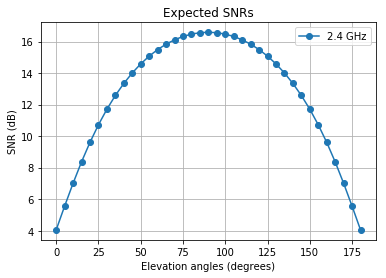

In [3]:
phi = np.pi*np.array(range(0,181,5))/180
plt.plot(180*phi/np.pi, snr, '-o', label='2.4 GHz')
plt.title('Expected SNRs')
plt.xlabel('Elevation angles (degrees)')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid()

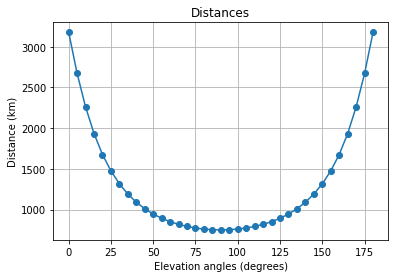

In [4]:
d = l_d.distance()
phi = np.pi*np.array(range(0,181,5))/180
plt.plot(180*phi/np.pi, d*1e-3, '-o')
plt.title('Distances')
plt.xlabel('Elevation angles (degrees)')
plt.ylabel('Distance (km)')
plt.grid()

### 'precise'

In [5]:
l_p = LinkBudget(750*1e3, 'precise',\
    L_node = 100+90, incl = 90 - 61.5,\
    lat_gs = 22, long_gs = 200, eps_min = 5)
snr, EIRP = l_p.expected_snr(2.4e9, 1, 7.3, 35, 1.5e6, 1000)
min(snr)

5.556823874020452

In [6]:
max(snr)

8.667000351847676

### Visibility time

In [7]:
alts = np.array([i for i in range(200, 2000, 50)])*1e3

l_d = LinkBudget(alts, 'draft')
l_p = LinkBudget(alts, 'precise',\
    L_node = 100+90, incl = 90 - 61.5,\
    lat_gs = 22, long_gs = 200, eps_min = 5)

t0 = pd.DataFrame(np.round(l_d.visibility_time(),2),\
                  columns=['Visibility time (min) formula 1.4.6'])
t1 = pd.DataFrame(np.round(l_p.visibility_time(),2),\
                 columns=['Visibility time (min) formula 1.4.7'])

In [8]:
alts = pd.DataFrame(alts, columns=['Orbit altitudes (km)'])
pd.concat([alts*1e-3, t0, t1], axis=1, ignore_index=False, join='inner')

,Orbit altitudes (km),Visibility time (min) formula 1.4.6,Visibility time (min) formula 1.4.7
0,200.0,6.93,NaN
1,250.0,7.81,NaN
2,300.0,8.62,NaN
3,350.0,9.39,NaN
4,400.0,10.12,2.53
5,450.0,10.82,4.04
6,500.0,11.50,5.16
7,550.0,12.15,6.12
8,600.0,12.79,6.97
9,650.0,13.42,7.76


##  References

\[1\] L. Kantor, Satellite communication and broadcasting. Directory,Radio and communication,1988